## HYD 142 Exam

Kenneth Larrieu

### 1.

a. If $Z = X-Y$, where $X$ and $Y$ are independent continuous random variables, then the distribution of Z can be computed as the convolution of $X$ and $-Y$. More precisely:

$$\boxed{f_Z(z) = \int_{-\infty}^{\infty} f_X(z+y)f_Y(y) dy}$$

b. If $X$ and $Y$ are dependent continuous random variables, then a conditional distribution must be used in the integral:

$$\boxed{f_Z(z) = \int_{-\infty}^{\infty} f_{X | Y}(z+y | y)f_Y(y) dy = \int_{-\infty}^{\infty} f_{Y | X}(x-z | x)f_X(x) dx}$$

c. If $X$ and $Y$ are independent discrete random variables:

$$\boxed{p_Z(z) = \sum_{y_i \in supp(Y)} p_X(z+y_i) p_Y(y_i)}$$

Similarly, if $X$ and $Y$ are dependent discrete random variables:

$$\boxed{p_Z(z) = \sum_{y_i \in supp(Y)} p_{X | Y}(z+y | y)p_Y(y) = \sum_{x_i \in supp(X)} p_{Y | X}(x-z | x)p_X(x)}$$

d. To get the characteristic function of $Z$ for independent continuous $X$ and $Y$ we use the following property of a characteristic function: if $X_1, X_2, ... X_n$ are independent, then

$$\varphi_{a_1 X_1 + a_2 X_2 + ... + a_n X_n}(t) = \varphi_{X_1}(a_1 t) + \varphi_{X_2}(a_2 t) + ... + \varphi_{X_n}(a_n t)$$

Thus,

$$\varphi_Z(t) = \varphi_X(t) + \varphi_Y(-t) = \mathbb{E}[e^{i t X}] + \mathbb{E}[e^{-i t Y}] = \boxed{\int_{-\infty}^{\infty} f_X(x) e^{i t x} dx + \int_{-\infty}^{\infty} f_Y(y) e^{-i t y} dy}$$

e. To get the variance of Z, we can use the fact that $Var(Z) = Cov(Z, Z) = Cov(X-Y, X-Y)$ and that the covariance operator is bilinear:

$$Var(Z) = Cov(X-Y, X-Y) = Cov(X,X) + Cov(Y,Y) -2Cov(X,Y) = \sigma_X^2 + \sigma_Y^2 - 2Cov(X,Y)$$

f. If $W = \max(X, Y)$ and $X$ and $Y$ are independent, then:

$$\boxed{F_W(w) = F_X(w) \cdot F_Y(w)}$$

g.

h. The key difference between extreme distributions of type I and type II is that a type I distribution is defined for all real numbers, whereas a type II distribution has a lower bound for a maximum value distribution or an upper bound for a minimum value distribution.

i. 

j. Geometric distributions and Bernoulli distributions describe the same process, whereby experiments are conducted which may have one of two outcomes. A Bernoulli r.v. denotes the outcome of a single trial, whereas a geometric distribution denotes the number of trials until the first success. Typically $p$ is used as a parameter to indicate the probability of success for a single trial.

Exponential and Poisson distributions both describe the same process, namely a Poisson process, whereby an event may occur or not occur at any point in time (i.e. along a continuum), with the probability of a event occuring within an interval being proportional to the size of the interval. An exponential distribution describes the amount of time before the first event occurs, whereas a Poisson distribution describes the number of events that occur within some amount of time. Typically $\lambda$ is the parameter used to indicate the average rate of event occurences.

### 2.

a. Plotting contours of constant g:

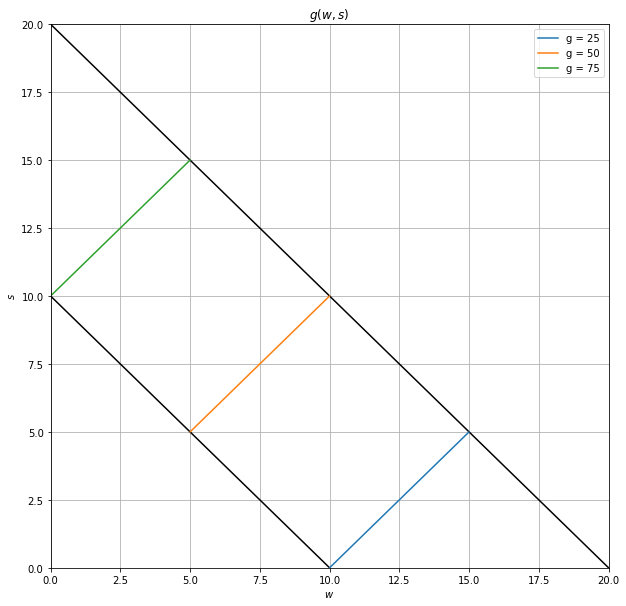

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
xs = np.linspace(0, 21, 2001)
lb = [10 - x for x in xs]
ub = [20 - x for x in xs]
ax.plot(xs, lb, 'black')
ax.plot(xs, ub, 'black')
gs = range(25, 76, 25)
for g in gs:
    xc = [x for x in xs if 10 <= (g-50)/2.5 + 2*x <= 20]
    contour = [(g-50)/2.5 + x for x in xc]
    ax.plot(xc, contour, label=r'g = %s' % g)

ax.set_title(r'$g(w, s)$')
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$s$')
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.grid()
ax.legend()
plt.show()

b. Since the $f_{W, S}(w, s) = K = \text{const.}$ over the trapezoid, the integral is simply:

$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{W, S}(w, s) \, dw \, ds = K \cdot 150 = 1 \quad \rightarrow \quad \boxed{K = \frac{1}{150}}$$

c. From the plot above, we see that $G \geq 75$ corresponds to the integral of $f_{W, S}(w, s)$ over the area above the $g=75$ contour and bounded by the black lines. We can compute this integral geometrically as:

$$P(G \geq 75) = K \cdot 25 = \frac{25}{150} = \boxed{\frac{1}{6}}$$

d. Integrating the joint density $F_{W, S}(w, s)$ over the area below the contour for $g$ and within the bounds gives the CDF:

Integrating yields:

$$f_G(g) = \frac{1}{75} \cdot \frac{g}{25}, \quad 0 \leq g \leq 25; \quad \frac{1}{75}, \quad 25 \leq g \leq 75; \quad \frac{40 - \frac{2}{5} g}{750}, \quad 75 \leq g \leq 100; \quad 0, \quad \text{o.w.}$$

Graphing the pdf:

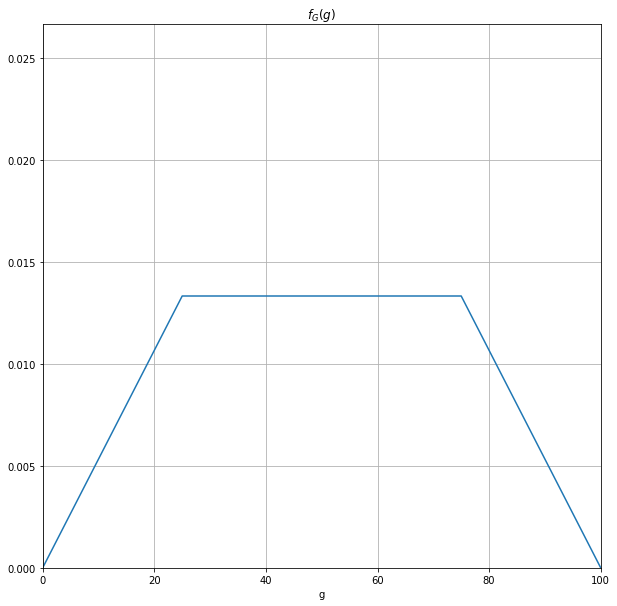

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
g = np.linspace(0, 100, 101)
pdf = np.piecewise(g, [(g>=0)&(g<=25), (g>25)&(g <= 75), (g>75)&(g<=100)], [lambda g: g*1.0/(75*25), lambda g: 1.0/75, lambda g: (40 - g *2.0/5)/750.0])
ax.set_xlabel('g')
ax.set_title(r'$f_G(g)$')
ax.grid()
ax.set_xlim(0, 100)
ax.set_ylim(0, 2.0/75)
ax.plot(g, pdf)
plt.show()

e. Determine $P(W < 1 | G = 75)$

$$P(W < 1 | G = 75) = \frac{P(W < 1 \cap G = 75)}{P(G = 75)}$$

f. 

g. 

h. 

### 3.

a. The nuts per cookie are is a Poisson random variable (call it $X$) with $\lambda = 1.5$. Thus,

$$P(X \geq 1) = 1 - P(X < 1) = 1 - P(X=0) = \boxed{1 - \frac{1.5^0 e^{-1.5}}{0!} = 1- e^{-1.5} \approx 0.78}$$

b.

$$\sigma_X^2 = \lambda = \boxed{1.5}$$

c. For a box of $m$ cookies, then the number of nuts is equal to the sum of the nuts in each cookie $X_i$: call $C_m = X_{1} + X_{2} + ... X_{m}$, which is the total number of nuts in a box of $m$ cookies. Similarly, say $C_n = X_{1} + X_{2} + ... X_{n}$. Due to the linearity of the expectation value operator:

$$\mathbb{E}[C_n] = \mathbb{E}[X_{1}] + \mathbb{E}[X_{2}] + ... + \mathbb{E}[X_{n}] = n \cdot \lambda = 1.5 n$$

Since the number of cookies needs to be a whole number, we can see that the $C_m \neq \mathbb{E}[C_n]$ whenever $n$ is odd, so $P(C_m  = \mathbb{E}[C_n]) = 0$ in this case.

Then, in the case where $n$ is even, we want $P(C_m = \mathbb{E}[C_n]) = P(C_m = 1.5 n)$. The rest of the cases only apply to even $n$.

For $m=1$, then $C_m = X$ and we have

$$p_{C_m}(c) = \frac{1.5^c e^{-c}}{c!}$$

In which case $P(C_m = \mathbb{E}[C_n]) = p_{C_m}(1.5 n) = \frac{1.5^{1.5 n} e^{-1.5 n}}{(1.5 n)!}$

For $m=2$, then $C_m = X_1 + X_2$, and

$$p_{C_m}(c) = P(X_1 + X_2 = c) = P(X_2 = c - X_1) = \sum_{x=0}^c p_{X_1}(x) p_{X_2}(c - x) = \sum_{x=0}^c \frac{1.5^c e^{-3}}{x! (c-x)!} = \frac{1.5^c e^{-3} 2^c}{c!}$$

In which case $P(C_m = \mathbb{E}[C_n]) = p_{C_m}(1.5 n) = \frac{1.5^{1.5 n} e^{-3} 2^{1.5 n}}{(1.5 n)!}$

For $m=3$, then $C_m = X_1 + X_2 + X_3$, and

$$p_{C_m}(c) = P(X_3 = c - (X_1 + X_2)) = \sum_{x=0}^c p_{X_1 + X_2}(x) p_{X_3}(c-x) = \sum_{x=0}^c \frac{1.5^c e^{-4.5} 2^x}{x! (c-x)!} = 1.5^c e^{-4.5} \frac{3^c}{c!} $$

In which case $P(C_m = \mathbb{E}[C_n]) = p_{C_m}(1.5 n) = 1.5^{1.5 n} e^{-4.5} \frac{3^{1.5 n}}{(1.5 n)!}$

From here we can see a pattern and generalize:

$$p_{C_m}(c) = 1.5^c e^{-1.5 m} \frac{m^c}{c!}$$

Thus, we can conclude that:

$$\boxed{P(C_m = \mathbb{E}[C_n]) = 1.5^{1.5 n} e^{-1.5 m} \frac{m^{1.5 n}}{(1.5 n)!}, \quad n = \text{even}, \quad 0, \quad n = \text{odd}}$$

d. 

e. 

### 4. 

a. Since they are independent, the joint distribution is just the product:

$$\boxed{f_{I, D}(i, d) = \alpha \delta e^{-\alpha i - \delta d}}$$

b. A plot of contours for constant $h$:

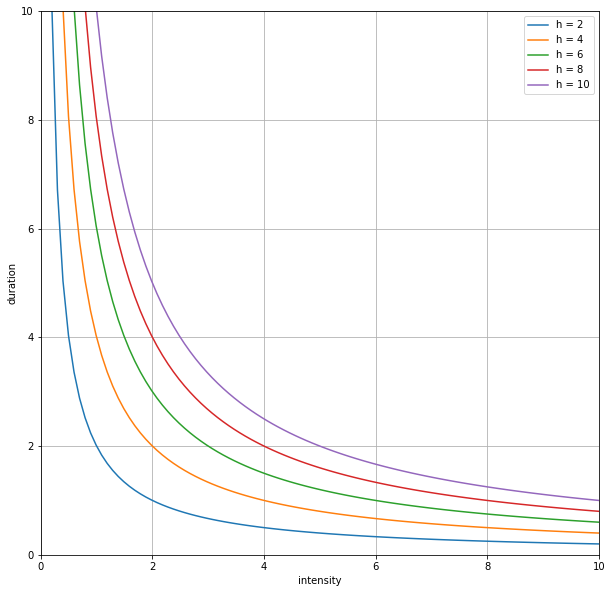

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlabel('intensity')
ax.set_ylabel('duration')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
intensities = np.linspace(0.1, 10, 101)
depths = range(2, 11, 2)
for depth in depths:
    durations = [depth/intensity for intensity in intensities]
    ax.plot(intensities, durations, label='h = %i' %depth)
ax.legend()
ax.grid()

c. The region where a given depth $h$ is not exceeded correspond to the area in the first quadrant and below the corresponding contour for $h$.

d.

$$F_H(h) = \int_0^{\infty} \int_0^{h/i} f_{I, D}(i, d) dd di = \alpha \delta \int_0^{\infty} e^{-\alpha i} \int_0^{h/i} e^{-\delta d} dd di$$

$$F_H(h) = \alpha \int_0^{\infty} e^{-\alpha i}(1 - e^{-\delta h/i}) di = 1 - \alpha \int_0^{\infty} e^{-\alpha i} e^{-\delta h/i} di$$

$$F_H(h) = 1 - 2 \sqrt{\alpha \delta h} \, K_1\left(2 \sqrt{\alpha \delta h}\right)$$

where $K_1$ is the modified Bessel function of the second kind.

e. 

$$f_H(h) = \frac{d F_H(h)}{dh} = \left(\sqrt{\frac{\alpha \delta}{h}} - \frac{1}{h}\right) K_1(2 \sqrt{\alpha \delta h}) + 2\alpha \delta K_0(2 \sqrt{\alpha \delta h})$$

f.

g. 

### 5. 

a. $P(\text{first 4 days rainy}) = P(\text{rain day 1}) P(\text{rain day 2 } | \text{ rain day 1}) P(\text{rain day 3 } | \text{ rain day 2}) P(\text{rain day 4 } | \text{ rain day 3}) = \frac{10}{80} \cdot \frac{10}{50} \cdot \frac{10}{50} \cdot \frac{10}{50} = \boxed{0.001}$

b. The following problems can be solved using state vector transitions for the Markovian process. The initial state vector is 

$$\vec{x_1} = \begin{bmatrix}\frac{1}{8} \\ \frac{7}{8} \end{bmatrix}$$

where the first element represents the probability of rain and the second element represents the probability of a dry day.

Then the transition matrix is then

$$A = \begin{bmatrix} \frac{1}{5} & \frac{1}{10}\\ \frac{4}{5} & \frac{9}{10}\end{bmatrix}$$

so the state on the $n$th day is:

$$\vec{x_n} = A^{n-1} \vec{x_1}$$

The probability that at least 3 dry days follow a rainy day is:

$$\sum_{n=1}^{\infty} P(\text{rain on nth day}) \cdot \frac{4}{5} \cdot \frac{9}{10} \cdot \frac{9}{10}$$

Since the probability that the next 3 days are dry after a rainy day is $\frac{4}{5} \cdot \frac{9}{10} \cdot \frac{9}{10}$.

The sum is the first element of the vector summation:

$$\sum_{n=1}^{\infty} P(\text{rain on nth day}) = \sum_{n=1}^{\infty} \vec{x_n} = \left(\sum_{n=1}^{\infty} A^{n-1}\right) \vec{x_1}$$

Finding the eigenvalues and eigenvectors of $A$ allows the following diagonalization:

$$A = PDP^{-1} = \begin{bmatrix} 1 & 1\\ -1 & 8\end{bmatrix} \begin{bmatrix} \frac{1}{10} & 0\\ 0 & 1\end{bmatrix} \begin{bmatrix} \frac{8}{9} & \frac{-1}{9}\\ \frac{1}{9} & \frac{1}{9}\end{bmatrix}$$

Thus $A^n = P D^n P^{-1}$, and the sum becomes:

$$ P\left(\sum_{n=1}^{\infty} D^{n-1}\right) P^{-1} \vec{x_1}$$

c. 

d. The steady state vector $\vec{x_{\infty}}$ satisfies:

$$A \vec{x_{\infty}} = \vec{x_{\infty}}$$

which corresponds to an eigenvector of $A$ with eigenvalue 1. The elements must also sum to 1 to represent probabilities. This corresponds to the vector:

$$\boxed{\vec{x_{\infty}} = \begin{bmatrix}\frac{1}{9} \\ \frac{8}{9} \end{bmatrix}}$$

This answer makes sense because the steady state probability of rain is between $P(rain_t | dry_{t-1})$ and $P(rain_t | rain_{t-1})$, and closer to the former because it is more likely that it is dry the previous day. The steady state probability of a dry day is analogously sensible.

### 6. 

a. Probability that it does not rain in a month for all combinations of $\lambda = 10, 20$ arrivals per year, $1/\beta = 0.5, 1$ days, $1/p = 2, 5$ cells per weather disturbance.

Converting units yields $\lambda = \frac{10}{12}, \frac{20}{12}$ arrivals per month,  $1/\beta = 0.5 \cdot \frac{12}{365}, \frac{12}{365} $ months.

$$P(N[0, t] = 0) = \left(\frac{p}{1 - (1-p)e^{-\beta t}}\right)^{\lambda/\beta} e^{-\lambda t}$$

Plugging in $t = 1$ month for each combination of parameters yields the following probabilities:

In [58]:
lambdas = [10.0/12, 20.0/12]
betas = [365/6.0, 365/12.0]
ps = [1.0/2, 1.0/5]

df = pd.DataFrame(columns=[r'$\lambda$', r'$\beta$', r'$p$', r'$P(\text{no rain})$'])

for lamb in lambdas:
    for beta in betas:
        for p in ps:
            no_rain = ((p)/(1 - (1 - p) * np.exp(-beta*1)))**(lamb/beta) * np.exp(-lamb*1)
            row = pd.DataFrame([[lamb, beta, p, no_rain]], columns=df.columns.tolist())
            df = df.append(row, ignore_index=True)
            
df = df.round(6)
df

,$\lambda$,$\beta$,$p$,$P(\text{no rain})$
0,0.833333,60.833333,0.5,0.430491
1,0.833333,60.833333,0.2,0.425121
2,0.833333,30.416667,0.5,0.426423
3,0.833333,30.416667,0.2,0.415851
4,1.666667,60.833333,0.5,0.185323
5,1.666667,60.833333,0.2,0.180728
6,1.666667,30.416667,0.5,0.181837
7,1.666667,30.416667,0.2,0.172932


The results make sense because when $p$ is smaller (more cells in weather disturbance), the probability of no rain in the month goes down. As $\lambda$ goes up (more arrivals per month), the probability of no rain in the month goes down. And as $\beta$ goes down (shorter time between cells), the probability of no rain in the month goes down.

b. Find the pdf of the time $T$ between arrivals.

The CDF of the time between arrivals $T$ is:

$$F_T(t) = P(T \leq t) = 1 - P(T > t) = 1 - P(N[0, t] = 0) = 1 - \left(\frac{p}{1 - (1-p)e^{-\beta t}}\right)^{\lambda/\beta} e^{-\lambda t}$$

Therefore the pdf of $T$ is:

$$\boxed{f_T(t) = \frac{d F_T(t)}{dt} = \lambda e^{-\lambda t} \left(\frac{p}{1 - (1 - p) e^{-\beta t}}\right)^{\lambda/\beta} \left[1 - \frac{(1 - p) e^{-\beta t}}{1 - (1 - p) e^{-\beta t}}\right]}$$

Again, this makes sense because each term in the pdf decreases as $t$ increases. The leading term is the pdf for an exponential distribution with parameter $\lambda$, so this distribution drops off slightly faster than the exponential due to the additional clustering of children.